# Convolution Filters

* In this notebooks, we will explore how convolutions work by implementing 2D convolutions on a grayscale image.
* We will do this on the ascent image from scipy, since it's a built in picture with lots of angles and lines.

In [1]:
%load_ext autoreload 
%autoreload 2

## Install `tfutils`


In [4]:
!pip install -e /content/drive/MyDrive/projects/tfutils

Obtaining file:///content/drive/MyDrive/projects/tfutils
  Running setup.py develop for tfutils


## Some imports

In [4]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import misc as scipymisc

## Visualize Image

In [21]:
img = scipymisc.ascent()
img.shape

(512, 512)

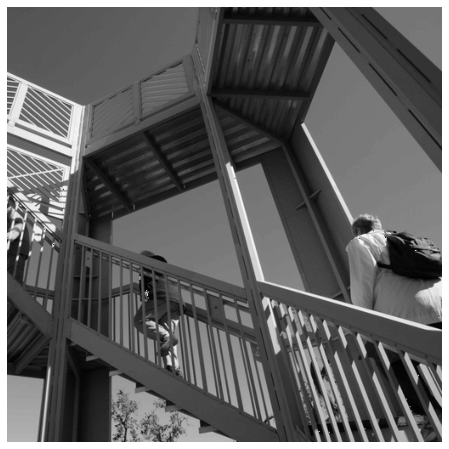

In [22]:
plt.figure(figsize=(8, 8))
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(img)
plt.show()

## Experimenting with different filters

In [32]:
img # input image
filter_weights =  np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

In [42]:

def convolve(img, filter_weights):
    imgsize_x, imgsize_y = img.shape
    filtersize_x, filtersize_y = filter_weights.shape
    imgconvsize_x, imgconvsize_y = imgsize_x - filtersize_x + 1, imgsize_y - filtersize_y + 1
    imgconv = np.zeros_like(img)
    filter_sum = filter_weights.sum()
    if filter_sum != 0:
        filter_weights = filter_weights/filter_sum

    for x in range(imgsize_x - filtersize_x):
        for y in range(imgsize_y - filtersize_y):
            conv = (filter_weights*img[x:(x+filtersize_x), y:(y+filtersize_y)]).sum()

            if conv < 0:
                conv = 0
            elif conv > 255:
                conv = 255
            
            imgconv[x, y] = conv

    return imgconv



In [44]:
filter_weights_lst = [None]*3
filter_weights_lst[0] = np.array([[0, 1, 0],
                                  [1, -4, 1],
                                  [0, 1, 0]])

filter_weights_lst[1] = np.array([[-1, -2, -1],
                                  [0, 0, 0],
                                  [1, 2, 1]])

filter_weights_lst[2] = np.array([[-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]])

imgconv_lst = [convolve(img, filter_weights) for filter_weights in filter_weights_lst]

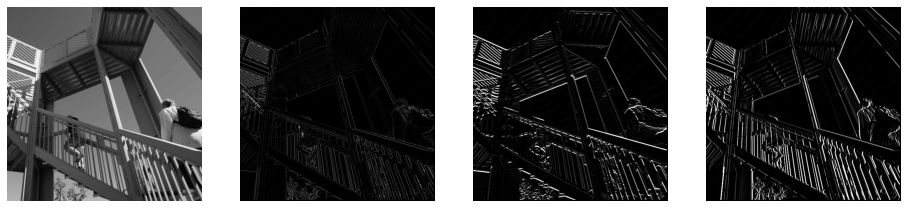

In [46]:
fig, axn = plt.subplots(1, len(filter_weights_lst)+1, figsize=(16, 10))
plt.gray()


for i, ax in enumerate(axn):
    if i == 0:
        ax.imshow(img)
    else:
        ax.imshow(imgconv_lst[i-1])

    ax.grid(False)
    ax.set_axis_off()

